# Undernourishment & Happiness Index Analysis
In this section we are going to analyze prevalence of undernourishment and happiness index and look for correlations between them. An importatn question we want to solve is whether the change of prevalence of undernourishment has any effect on the happiness index for each country.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.express as px

In [2]:
# Read Dataset
nourish_data = pd.read_csv("prevalence-of-undernourishment.csv")
happiness_data = pd.read_csv("World Happiness Index by Reports 2013-2023 no nulls.csv")

### Data Cleanning
Since the time spans of the two datasets do not completely overlap and the country lists of the datasets are inconsistent, we need to clean up these two datasets and combine them together.

In [126]:
# Rename the column name of undernourishment dataset from "Entity" to "Country"
nourish_data.rename(columns = {"Entity" : "Country"}, inplace=True)
# Use how="inner" to get the intersection of keys from both frames.
cleaned_df = happiness_data.merge(nourish_data, how="inner", on=["Country", "Year"])
cleaned_df.to_csv("cleaned_df.csv", index=False)



assert len(cleaned_df.columns) == 6
assert cleaned_df.loc[(cleaned_df["Country"] == "Chad") & 
(cleaned_df["Year"] == 2016), "Prevalence of undernourishment (% of population)"].values[0] == 28.5
assert cleaned_df.loc[(cleaned_df["Country"] == "France") & 
(cleaned_df["Year"] == 2020), "Index"].values[0] == 6.664

### Analyze top ranked and low ranked countries
Let's start by finding the countries that has the highest happiness index and their prevalence of undernourishment.

In [105]:
def find_toprank(year, above_rank):
    """
    This function takes year and above_rank as input,
    and it should return a list of ranked countries in
    that given year.
    """
    happy_year = cleaned_df[cleaned_df["Year"] == year]
    countries_list = list(happy_year.loc[(cleaned_df["Rank"] < above_rank) , "Country"])
    return countries_list


assert find_toprank(2013, 2) == ["Denmark"]
assert find_toprank(2012, 2) == []

In [115]:
def find_lowrank(year, below_rank):
    """
    This function takes year and above_rank as input,
    and it should return a list of ranked countries in
    that given year.
    """
    happy_year = cleaned_df[cleaned_df["Year"] == year]
    countries_list = list(happy_year.loc[(cleaned_df["Rank"] > below_rank) , "Country"])
    return countries_list


assert find_lowrank(2013, 155) == ["Togo"]
assert find_lowrank(2015, 180) == []

In [6]:
high_ranked = find_toprank(2020, 6)
high_ranked

['Denmark', 'Finland', 'Iceland', 'Norway', 'Switzerland']

By using our functions, we found that the top 5 countries that has the highest happiness index in 2020 are Denmark, Finland, Iceland, Norway and Netherlands. Now let us look at their prevalence of undernourishment in 2020.

In [7]:
for top_country in high_ranked:
    print(cleaned_df.loc[(cleaned_df["Country"] == top_country) & (cleaned_df["Year"] == 2020)])

     Country  Year  Index  Rank Code  \
223  Denmark  2020  7.646     2  DNK   

     Prevalence of undernourishment (% of population)  
223                                               2.5  
     Country  Year  Index  Rank Code  \
274  Finland  2020  7.809     1  FIN   

     Prevalence of undernourishment (% of population)  
274                                               2.5  
     Country  Year  Index  Rank Code  \
360  Iceland  2020  7.504     4  ISL   

     Prevalence of undernourishment (% of population)  
360                                               2.5  
    Country  Year  Index  Rank Code  \
649  Norway  2020  7.488     5  NOR   

     Prevalence of undernourishment (% of population)  
649                                               2.5  
         Country  Year  Index  Rank Code  \
817  Switzerland  2020   7.56     3  CHE   

     Prevalence of undernourishment (% of population)  
817                                               2.5  


We can see that the prevalence of undernourishment in top 5 happiness index countries are all below or equal to 2.5% of their population. What about the low ranked countries?

In [127]:
low_ranked = find_lowrank(2020, 146)
low_ranked

['Afghanistan', 'Botswana', 'Central African Republic', 'Rwanda', 'Tanzania']

In [128]:
for low_country in low_ranked:
    print(cleaned_df.loc[(cleaned_df["Country"] == low_country) & (cleaned_df["Year"] == 2020)])

       Country  Year  Index  Rank Code  \
6  Afghanistan  2020  2.567   153  AFG   

   Prevalence of undernourishment (% of population)  
6                                              29.8  
      Country  Year  Index  Rank Code  \
112  Botswana  2020  3.479   147  BWA   

     Prevalence of undernourishment (% of population)  
112                                              21.9  
                      Country  Year  Index  Rank Code  \
160  Central African Republic  2020  3.476   149  CAF   

     Prevalence of undernourishment (% of population)  
160                                              52.2  
    Country  Year  Index  Rank Code  \
721  Rwanda  2020  3.312   150  RWA   

     Prevalence of undernourishment (% of population)  
721                                              35.8  
      Country  Year  Index  Rank Code  \
824  Tanzania  2020  3.476   148  TZA   

     Prevalence of undernourishment (% of population)  
824                                              22.6  

For the low ranked happiness index countries, their prevalence of undernourishment are much higher than high ranked countries. All of their prevalence of undernourishment are above 20% of their population.

### Data Visualization

Now let's take a look at the changes in happiness index and prevalence of undernourishement between 2013-2020 for Afghanistan.

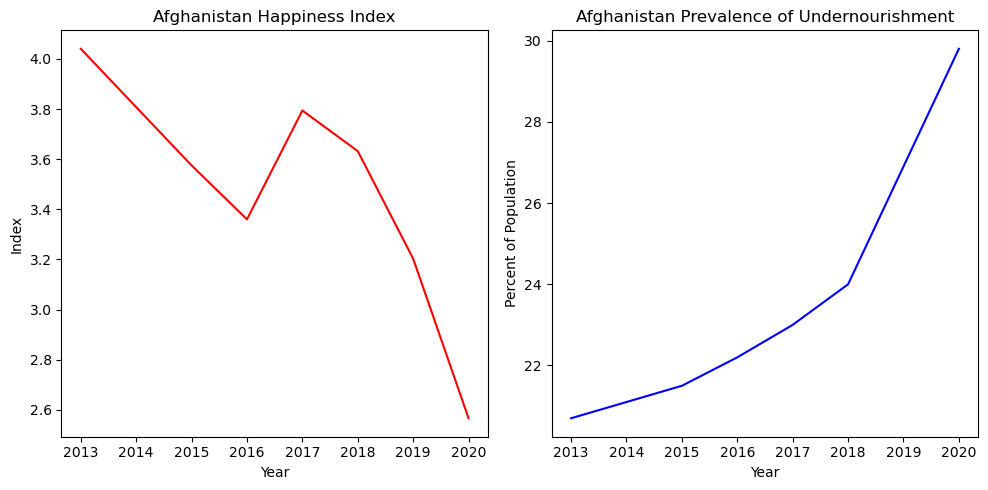

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(cleaned_df.loc[cleaned_df["Country"] == "Afghanistan"]["Year"], 
              cleaned_df.loc[cleaned_df["Country"] == "Afghanistan"]["Index"], color="red")
ax[0].set(title="Afghanistan Happiness Index", xlabel="Year", ylabel="Index")
ax[1].plot(cleaned_df.loc[cleaned_df["Country"] == "Afghanistan"]["Year"], 
              cleaned_df.loc[cleaned_df["Country"] == "Afghanistan"]["Prevalence of undernourishment (% of population)"], color="blue")
ax[1].set(title="Afghanistan Prevalence of Undernourishment", xlabel="Year", ylabel="Percent of Population")
fig.tight_layout()

By looking at the subplots we can clearly see that although the happiness index increased in 2016 to 2017, but the Afghanistan Happiness Index plot shows a downward tend overall. The prevalence of undernourishment plot shows an upward trend, by comparing these two subplots, we can speculate that the rise in prevalence of undernourishment may lead to a decline in happiness index.

### Pearson Correlation Coefficient
Pearson correlation coefficient can used to determine the correlation between two variables, we plan to use pearson correlation coefficient to find the correlation between prevalence of undernourishement and happiness index.

In [125]:
x = cleaned_df["Prevalence of undernourishment (% of population)"]
y = cleaned_df["Index"]
corr_coef, p_value = pearsonr(x, y)
print("Correlation Coefficient:",corr_coef)

Correlation Coefficient: -0.577848217141081


From our dataset, we found that the pearson correlation coefficient is around -0.58, this means that, to a moderate extent, an increase in one variable leads to a decrease in another. This should confirm our previous speculation about the relationship between prevalence of undernourishement and happiness index. But we know that there are many factors behind each country's happiness index, we started thinking about how each country's pearson correlation coefficient differs.

In [123]:
def find_coefficient(country):
    """
    This function takes country as input and it should return the pearson correlation coeffcient of that country.
    """
    x = cleaned_df.loc[cleaned_df["Country"] == country, "Prevalence of undernourishment (% of population)"]
    y = cleaned_df.loc[cleaned_df["Country"] == country, "Index"]
    corr_coef, p_value = pearsonr(x, y)
    return corr_coef

In [124]:
# Get all the country name
country_list = []
for country in cleaned_df["Country"]:
    if country not in country_list:
        country_list.append(country)
# Create a new dataframe for coefficients, in order to be able to find correlations 
# where prevalence of undernourishement has negative effect on happiness index, we 
# only select cases where the pearson correlation coefficient is negative.
coefficient_data = []
for countries in country_list:
    if find_coefficient(countries) < 0:
        coefficient_data.append([countries, find_coefficient(countries)])
coefficient_df = pd.DataFrame(coefficient_data, columns=["Country", "Coefficient"]).sort_values("Coefficient")


assert len(country_list) == 137

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



In [122]:
fig = px.bar(coefficient_df, x="Coefficient", y="Country", color="Country",
             title="Pearson Correlation Coefficient for countries with negative correlations",
             width=1000, height=950)
fig.update_layout(xaxis=dict(autorange="reversed"))
fig.show(renderer='iframe')

### Result
In general, through the analysis of the two datasets, we can deduce that prevalence of undernourishement and happiness have a negative correlation, and the increase of prevalence of undernourishement can lead to the decrease of happiness index to a certain extent. There are many factors contributing to the change in happiness index, and the correlation between the two variables varies in each country. But through our analysis, we can see that in Venezuela, Guatemala and other countries, their pearson correlation coefficient is very close to -1, which means that the change of prevalence of undernourishement has a strong relationship with the change of happiness index in these countries. We believe that our analysis can help the governments of these countries and relevant organizations to make improvements in prevalence of undernourishement to improve their happiness index.